### Flavia Carravieri
# <span style="color:deeppink">  NSL - ESERCITAZIONE 2</span>


### Esercizio 2.1
- Si è calcolato il seguente integrale tramite Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

I grafici sottostanti rappresentano l'andamento del calcolo dell'integrale in funzione del numero di blocchi - 100 blocchi da 100 lanci ciascuno. 

Estraendo x uniformemente in [0,1) si è ottenuto $I=0.997939 \pm 0.00528417$ . 

Per l'importance sampling, invece, si è scelta come $d(x)$ lo sviluppo di Taylor dell'integranda, in $x=1$, che, dopo la normalizzazione, risulta essere $d(x)=2(1-x)$. Si inverte quindi la funzione cumulativa per estrarre x secondo la nuova distribuzione di probabilità. 
Il risulato ottenuto è $I=1.00152 \pm 0.00127008$

Come atteso, l'incertezza è diminuita in modo significativo grazie alla scelta di una distribuzione di probabilità che favorisce gli intervalli in cui l'integranda ha un peso maggiore sul calcolo. Per ridurre ulteriormente l'errore si potrebbe aumentare il numero di lanci, poichè per le tecniche Monte Carlo esso scala come $\frac{1}{\sqrt{N}}$, anche se questo comporterebbe un maggiore sfrozo computazionale, oppure si potrebbe cercare un'altra $d(x)$ che sia ancora più efficace. 


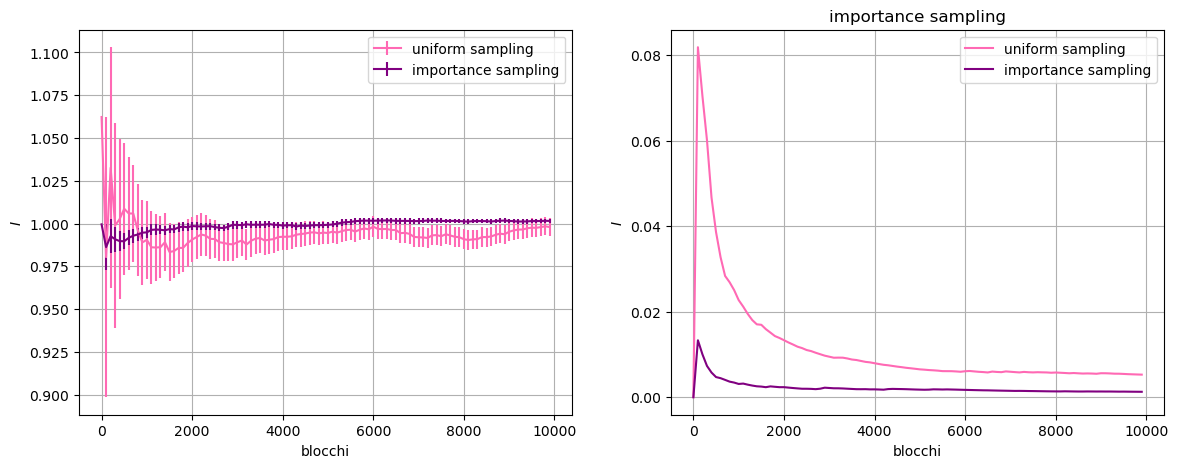

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x=np.loadtxt('esercizio2.1/dati_unif.out', usecols=(0)) #coordinata x con numero di blocchi

y_unif=np.loadtxt('esercizio2.1/dati_unif.out', usecols=(1))
err_unif=np.loadtxt('esercizio2.1/dati_unif.out', usecols=(2))

y_imp_samp=np.loadtxt('esercizio2.1/dati_imp_samp.out', usecols=(1))
err_imp_samp=np.loadtxt('esercizio2.1/dati_imp_samp.out', usecols=(2))

fig, (F1, F2) = plt.subplots(1, 2, figsize=(14, 5))

F1.errorbar(x,y_unif, yerr=err_unif, color='hotpink', label='uniform sampling')
F1.errorbar(x,y_imp_samp, yerr=err_imp_samp, color='purple', label='importance sampling')
F1.set_xlabel('blocchi')
F1.set_ylabel(r'$I$')
F1.legend()
F1.grid()

F2.plot(x, err_unif, color='hotpink', label='uniform sampling')
F2.plot(x, err_imp_samp, color='purple', label='importance sampling')
F2.set_title('importance sampling')
F2.set_xlabel('blocchi')
F2.set_ylabel(r'$I$')
F2.legend()
F2.grid()

plt.show()

    

### Esercizio 2.2

Lo scopo di questo esercizio è effettuare due random walk tridimensionali, uno su un reticolo cubico discreto di passo $a=1$, muovendosi quindi in direzione $x$, $y$ o $z$, e uno nel continuo, muovendosi sempre di un passo lungo $a$ ma in una direzione generica estraendo uniformemente $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$


Si riportano di seguito i risultati ottenuti per $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ tramite data blocking, in funzione del numero di passi in ogni blocco. 

In entrambi i casi si osserva un andamendo diffusivo, quindi una compatibilità con l'andamento atteso $f(N)=k\sqrt{N}$, per valori di $k$ molto simili e vicini a uno. La crescita dell'incertezza all'aumentare dei passi è comprensibile considerando che avanzando nello spazio con passi randomici, anche il numero di possibili traiettorie aumenta portando ad un allargamento della distribuzione delle posizioni finali, cioè dell'incertezza. 

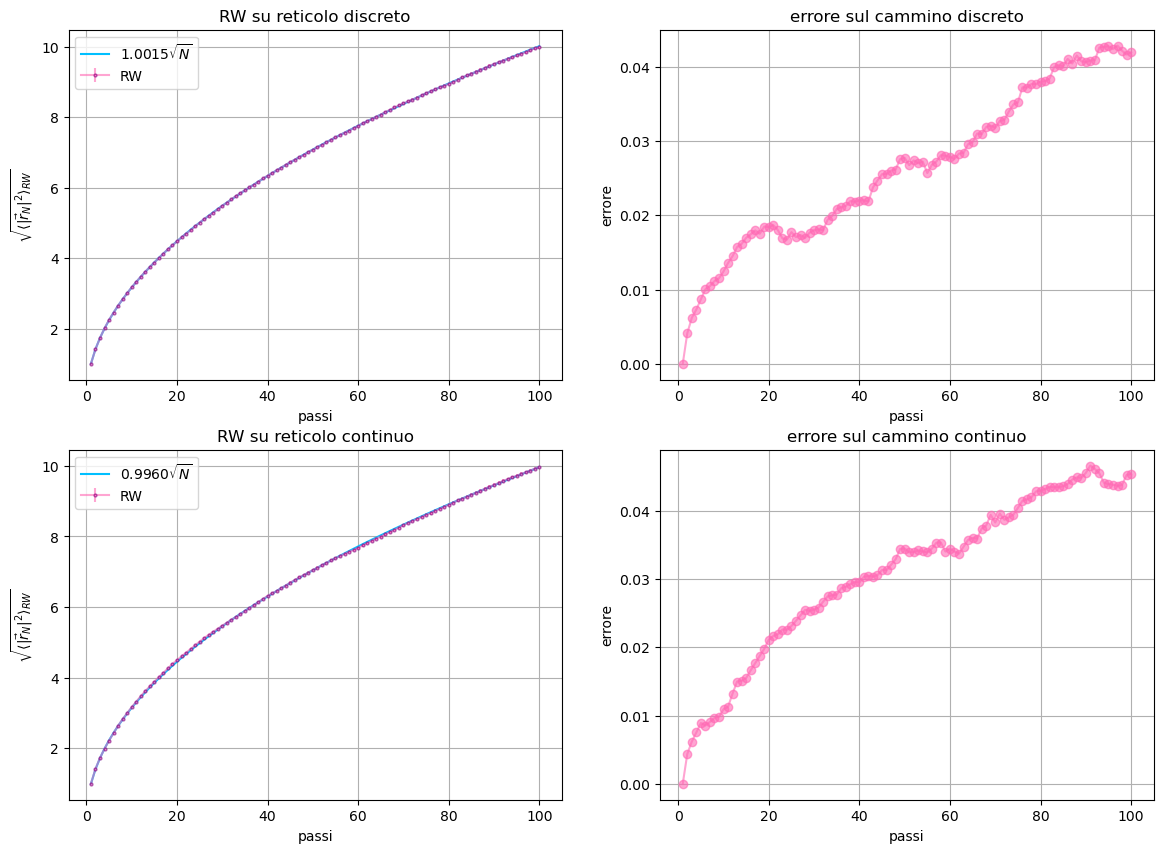

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def func(N, k): #funzione da fittare
    return k * np.sqrt(N)

x=np.loadtxt('esercizio_2.2_nuovo/RW_discreto.out', usecols=(0)) #coordinata x con numero di passi

y_disc=np.loadtxt('esercizio_2.2_nuovo/RW_discreto.out', usecols=(1))
err_disc=np.loadtxt('esercizio_2.2_nuovo/RW_discreto.out', usecols=(2))

y_cont=np.loadtxt('esercizio_2.2_nuovo/RW_continuo.out', usecols=(1))
err_cont=np.loadtxt('esercizio_2.2_nuovo/RW_continuo.out', usecols=(2))

# Fit per i dati Discreti
# p0 è una stima iniziale per k (ad esempio, 1.0)
popt_disc, pcov_disc = curve_fit(func, x, y_disc, p0=1.0)
k_disc = popt_disc[0] # Estrae il valore ottimale di k

# Fit per i dati Continui
popt_cont, pcov_cont = curve_fit(func, x, y_cont, p0=1.0)
k_cont = popt_cont[0] # Estrae il valore ottimale di k

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0,0].errorbar(x,y_disc, yerr=err_disc, color='hotpink', marker='o', markersize=2,  mec='purple', alpha=0.6, label='RW')
axs[0,0].plot(x, func(x, k_disc), color='deepskyblue', label=f'{k_disc:.4f}' + r'$\sqrt{N}$')
axs[0,0].set_title('RW su reticolo discreto')
axs[0,0].set_xlabel('passi')
axs[0,0].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
axs[0,0].legend()
axs[0,0].grid()

axs[0,1].plot(x, err_disc, marker='o', alpha=0.6, color='hotpink')
axs[0,1].set_title('errore sul cammino discreto')
axs[0,1].set_xlabel('passi')
axs[0,1].set_ylabel('errore')
axs[0,1].grid()

axs[1,0].errorbar(x, y_cont, yerr=err_cont, color='hotpink', marker='o', markersize=2,  mec='purple', alpha=0.6, label='RW')
axs[1,0].plot(x, func(x, k_cont), color='deepskyblue', label=f'{k_cont:.4f}' + r'$\sqrt{N}$')
axs[1,0].set_title('RW su reticolo continuo')
axs[1,0].set_xlabel('passi')
axs[1,0].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].plot(x, err_cont, marker='o', alpha=0.6, color='hotpink')
axs[1,1].set_title('errore sul cammino continuo')
axs[1,1].set_xlabel('passi')
axs[1,1].set_ylabel('errore')
axs[1,1].grid()

plt.show()